In [43]:
!apt install tesseract-ocr
!pip install pytesseract google-generativeai pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import google.generativeai as genai

# Paste your Gemini API key here
GEMINI_API_KEY = "YOUR API KEY HERE"
genai.configure(api_key=GEMINI_API_KEY)

# Initialize model
gemini_model = genai.GenerativeModel("gemini-1.5-flash-latest")


In [49]:
def homework_helper_agent(question):
    if not question or question.strip() in ["", ".", "-", "........"]:
        return " Please provide a valid question."

    prompt = f"""
You're an AI Homework Helper.

Respond step-by-step for numerical/math problems.
Respond with structured, clear answers for theoretical or science questions.

Here’s the question:
{question}
"""
    response = gemini_model.generate_content(prompt)
    return response.text.strip()


In [50]:
import pytesseract
from PIL import Image, ImageEnhance, ImageOps

def preprocess_image(image):
    image = ImageOps.grayscale(image)
    image = ImageEnhance.Contrast(image).enhance(2.5)
    image = image.resize((image.width * 2, image.height * 2))
    return image.convert("RGB")

def ocr_extract_text_from_image(image_path):
    try:
        image = Image.open(image_path)
        image = preprocess_image(image)
        text = pytesseract.image_to_string(image)
        return text.strip()
    except Exception as e:
        return f"OCR error: {str(e)}"


In [52]:
img_path = "output.jpg"  # Your actual image file
extracted_text = ocr_extract_text_from_image(img_path)
print("Extracted Text:", repr(extracted_text))

response = homework_helper_agent(extracted_text)
print("\nAgent Response:\n", response)


Extracted Text: '3x +9 = 18'

Agent Response:
 **1. Isolate the term with 'x':**

Subtract 9 from both sides of the equation:

3x + 9 - 9 = 18 - 9

This simplifies to:

3x = 9

**2. Solve for 'x':**

Divide both sides of the equation by 3:

3x / 3 = 9 / 3

This simplifies to:

x = 3

Therefore, the solution to the equation 3x + 9 = 18 is $\boxed{x = 3}$


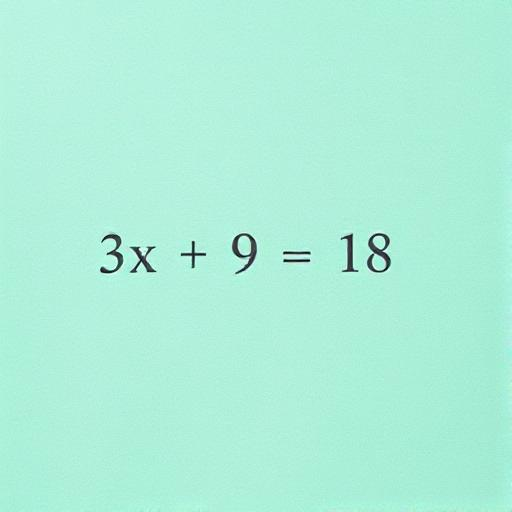